## Work
1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果

In [1]:
import os
import keras
import itertools
from keras.datasets import cifar10
from keras.utils import np_utils

import warnings
warnings.filterwarnings('ignore')

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = np_utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization, Activation

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   name="hidden_layer"+str(i+1))(x)
        x = BatchNormalization()(x)
        x = Activation("relu")(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 20
# 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
BATCH_SIZE_list = [2, 16, 32, 128, 256]
MOMENTUM = 0.95

In [8]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
from tensorflow.keras import optimizers

for BATCH_SIZE in BATCH_SIZE_list:
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = (f"BATCH_SIZE: {BATCH_SIZE}")
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 3072)]            0         
                                                                 
 hidden_layer1 (Dense)       (None, 512)               1573376   
                                                                 
 batch_normalization_3 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 activation_3 (Activation)   (None, 512)               0         
                                                                 
 hidden_layer2 (Dense)       (None, 256)               131328    
                                                                 
 batch_normalization_4 (Batc  (None, 256)              1024      
 hNormalization)                                           

3125/3125 [==============================] - 25s 8ms/step - loss: 1.2004 - accuracy: 0.5762 - val_loss: 1.5813 - val_accuracy: 0.4641
Epoch 9/20
3125/3125 [==============================] - 25s 8ms/step - loss: 1.1632 - accuracy: 0.5901 - val_loss: 1.4888 - val_accuracy: 0.4963
Epoch 10/20
3125/3125 [==============================] - 25s 8ms/step - loss: 1.1308 - accuracy: 0.5998 - val_loss: 1.3512 - val_accuracy: 0.5321
Epoch 11/20
3125/3125 [==============================] - 23s 7ms/step - loss: 1.0986 - accuracy: 0.6121 - val_loss: 1.4394 - val_accuracy: 0.4987
Epoch 12/20
3125/3125 [==============================] - 23s 8ms/step - loss: 1.0716 - accuracy: 0.6191 - val_loss: 1.4082 - val_accuracy: 0.5276
Epoch 13/20
3125/3125 [==============================] - 23s 7ms/step - loss: 1.0486 - accuracy: 0.6293 - val_loss: 1.5300 - val_accuracy: 0.4925
Epoch 14/20
3125/3125 [==============================] - 24s 8ms/step - loss: 1.0166 - accuracy: 0.6407 - val_loss: 1.4502 - val_accuracy

                                                                 
 batch_normalization_14 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                                 
 activation_14 (Activation)  (None, 128)               0         
                                                                 
 output (Dense)              (None, 10)                1290      
                                                                 
Total params: 1,742,474
Trainable params: 1,740,682
Non-trainable params: 1,792
_________________________________________________________________
Epoch 1/20
391/391 [==============================] - 7s 15ms/step - loss: 1.7434 - accuracy: 0.3890 - val_loss: 1.6693 - val_accuracy: 0.4014
Epoch 2/20
391/391 [==============================] - 5s 14ms/step - loss: 1.4546 - accuracy: 0.4877 - val_loss: 1.5226 - val_accuracy: 0.4606
Epoch 3/20
391/391 [====================

196/196 [==============================] - 5s 23ms/step - loss: 0.5711 - accuracy: 0.8230 - val_loss: 1.7151 - val_accuracy: 0.4695
Epoch 19/20
196/196 [==============================] - 4s 22ms/step - loss: 0.5276 - accuracy: 0.8390 - val_loss: 1.7284 - val_accuracy: 0.4719
Epoch 20/20
196/196 [==============================] - 4s 22ms/step - loss: 0.4876 - accuracy: 0.8549 - val_loss: 1.7690 - val_accuracy: 0.4697


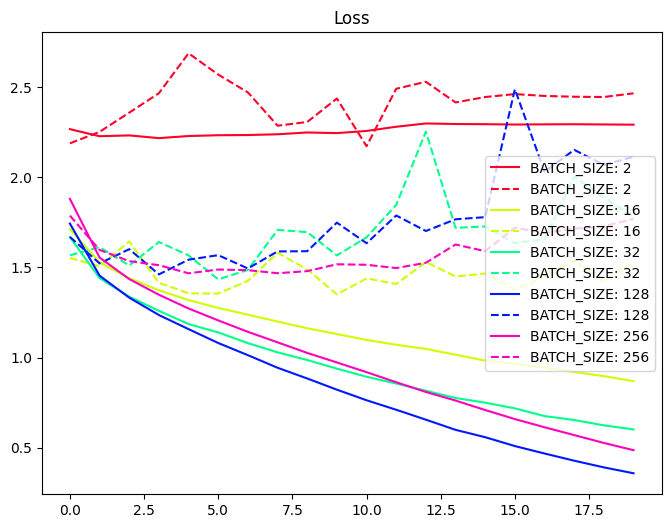

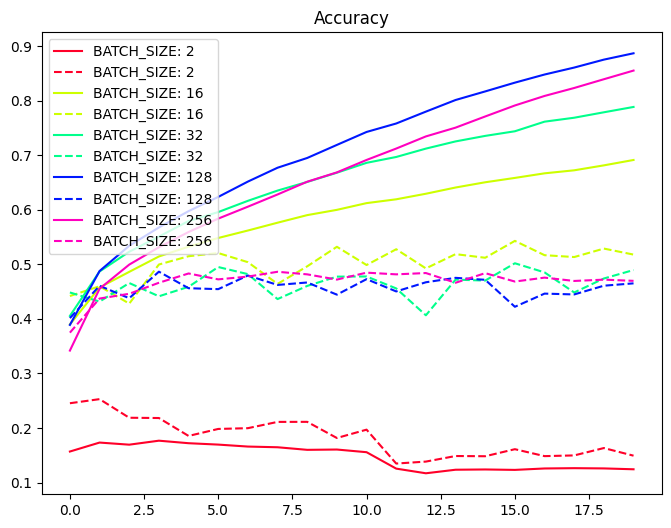

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
from matplotlib import cm as mplcm
from matplotlib import colors

NUM_COLORS = 5

cm = plt.get_cmap('gist_rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
color_bar = [scalarMap.to_rgba(i) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()